# Clase 6

### Inferencias de modelos LLM
Para realizar inferencias con modelos de lenguaje grande (LLM), tenemos dos opciones principales:

#### 1) Usar una API:
  Conectarnos a un servidor que ofrezca una API para realizar inferencias. Esta opción es conveniente porque no requiere que descarguemos el modelo localmente, lo que ahorra recursos computacionales y simplifica el proceso de implementación.

#### 2) Descargar el modelo:
  Descargar el modelo y realizar inferencias localmente. Esta opción puede ser más adecuada si necesitamos personalizar el modelo o si planeamos realizar múltiples inferencias sin depender de una conexión a internet.


### Llama
Llama es un modelo de lenguaje desarrollado por Meta AI, diseñado para la generación y comprensión del lenguaje natural. Utiliza una arquitectura de red neuronal profunda que permite una generación de texto coherente y contextualizada, lo que lo hace adecuado para diversas aplicaciones de procesamiento del lenguaje natural. Llama se caracteriza por su capacidad de realizar inferencias rápidas, lo que es esencial para aplicaciones en tiempo real, y su naturaleza de código abierto permite a los desarrolladores personalizar el modelo según sus necesidades, fomentando la innovación en el campo de la inteligencia artificial.


### Accesso Llama
* Download + Self Host (i.e. [download Llama](https://ai.meta.com/resources/models-and-libraries/llama-downloads))
* Hosted API Platform (e.g. [Groq](https://console.groq.com/), [Replicate](https://replicate.com/meta/meta-llama-3-8b-instruct), [Together](https://api.together.xyz/playground/language/meta-llama/Llama-3-8b-hf), [Anyscale](https://app.endpoints.anyscale.com/playground))

* Hosted Container Platform (e.g. [Azure](https://techcommunity.microsoft.com/t5/ai-machine-learning-blog/introducing-llama-2-on-azure/ba-p/3881233), [AWS](https://aws.amazon.com/blogs/machine-learning/llama-2-foundation-models-from-meta-are-now-available-in-amazon-sagemaker-jumpstart/), [GCP](https://console.cloud.google.com/vertex-ai/publishers/google/model-garden/139))

### Casos de uso
* Generación de contenidos
* Resumenes
* General Chatbots
* RAG (Retrieval Augmented Generation): Chat con tus propios datos
* Fine-tuning
* Agents

### Referencias
* [Meta Llama 3.1 Blog](https://ai.meta.com/blog/meta-llama-3-1/)
* [Getting Started with Meta Llama](https://llama.meta.com/docs/get-started)

## 1.1) Groq
Groq is Fast AI Inference, es una empresa de tecnología que se especializa en el diseño de hardware y software para la aceleración del procesamiento de datos mediante arquitecturas avanzadas de inteligencia artificial (IA). Su enfoque se centra en ofrecer soluciones de computación de alto rendimiento, optimizando la inferencia de modelos de aprendizaje automático a través de unidades de procesamiento específicas (LPU). Esto permite a las empresas realizar inferencias más rápidas y eficientes, facilitando la integración de modelos de IA en aplicaciones mediante su API, que simplifica el proceso de implementación en entornos de producción.


Crear API Grop

1. Ir a: https://console.groq.com/login
2. Crear una cuenta (seguir los pasos de la plataforma)
3. Ir al menu lateral "API Keys" - "Create API Key"
4. Definir un nombre identificativo
5. Copiar la clave y guardar


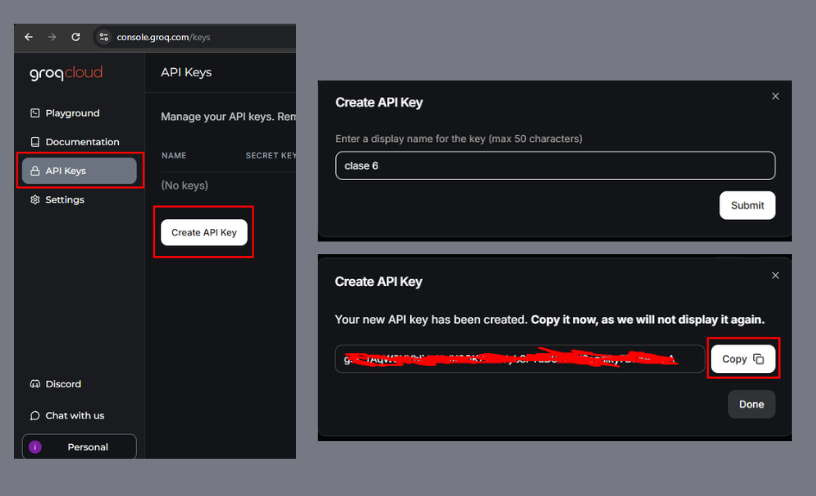

In [1]:
# APIS Grop para pruebas
# groq_api_key = os.getenv("GROQ_API_KEY", "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")
# groq_api_key = os.getenv("GROQ_API_KEY", "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")
# groq_api_key = os.getenv("GROQ_API_KEY", "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")
# groq_api_key = os.getenv("GROQ_API_KEY", "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")


In [2]:
import warnings

# Ignorar todos los warnings
warnings.filterwarnings("ignore")

# O, para ignorar solo los warnings de tipo UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 5.4 MB/s eta 0:00:00


In [4]:
import os
from groq import Groq

# Configurar la clave de API de Groq
groq_api_key = os.getenv("GROQ_API_KEY", "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")

# Crear un cliente para Groq
client = Groq(
    api_key=groq_api_key
)

# Función para realizar inferencia con el modelo de Groq
def inferencia_con_groq(prompt, temperature=0.7, max_tokens=1000, top_p=1.0, frequency_penalty=0.0, presence_penalty=0.0, model="llama3-groq-70b-8192-tool-use-preview"):
    try:
        # Crear una solicitud de inferencia con el modelo seleccionado
        chat_completion = client.chat.completions.create(
            messages=[
                {
                    "role": "system",
                    "content": "Eres un experto en inteligencia artificial aplicada a la salud."
                },
                {
                    "role": "user",
                    "content": prompt,
                }
            ],
            model=model,  # Modelo que deseas usar
            max_tokens=max_tokens,  # Número máximo de tokens en la respuesta
            temperature=temperature,  # Control de creatividad
            top_p=top_p,  # Nucleus sampling (amplia diversidad de las respuestas)
            frequency_penalty=frequency_penalty,  # Penaliza la repetición de palabras
            presence_penalty=presence_penalty  # Promueve la introducción de nuevas ideas
        )

        # Devolver la respuesta generada por el modelo
        return chat_completion.choices[0].message.content

    except Exception as e:
        print(f"Error al generar respuesta: {e}")
        return None

# Ejemplo de uso
if __name__ == "__main__":
    prompt = "Describe las aplicaciones de los modelos de lenguaje en el campo de la salud."

    # Realizar la inferencia con parámetros personalizados
    respuesta = inferencia_con_groq(prompt, temperature=0.5, max_tokens=500, top_p=0.9, frequency_penalty=0.1, presence_penalty=0.1, model="llama3-groq-70b-8192-tool-use-preview")

    if respuesta:
        print("Respuesta generada por el modelo:")
        print(respuesta)
    else:
        print("No se pudo generar una respuesta.")


Respuesta generada por el modelo:
Los modelos de lenguaje, como parte de la inteligencia artificial, han demostrado ser herramientas valiosas en el campo de la salud. A continuación, se presentan algunas de sus aplicaciones:

1. Análisis de sentimiento en pacientes: Los modelos de lenguaje pueden analizar textos o transcripciones de conversaciones con pacientes para identificar patrones de sentimiento, lo que puede ayudar a los profesionales de la salud a entender mejor la experiencia emocional de los pacientes y brindarles apoyo más adecuado.

2. Diagnóstico asistido por IA: Los modelos de lenguaje pueden ayudar a los profesionales de la salud a analizar información clínica y hacer diagnósticos más precisos. Por ejemplo, un modelo de lenguaje puede ayudar a identificar patrones en la descripción de los síntomas por parte de los pacientes, lo que puede ser útil para determinar posibles diagnósticos.

3. Generación de informes clínicos: Los modelos de lenguaje pueden ayudar a los profes

In [5]:
import os
from groq import Groq
import json

# Función para generar 10 chistes y almacenarlos en un archivo JSON
def generar_chistes(n_chistes=10, output_file="chistes_sinteticos.json"):
    chistes = []
    prompt = "Cuéntame un chiste divertido, sobre informatica."

    for i in range(n_chistes):
        print(f"Generando chiste {i+1}/{n_chistes}...")
        chiste = inferencia_con_groq(prompt, temperature=0.5, max_tokens=500, top_p=0.9, frequency_penalty=0.1, presence_penalty=0.1, model="llama3-groq-70b-8192-tool-use-preview")

        if chiste:
            print(f"Chiste {i+1}: {chiste}\n")  # Imprime el chiste bien formateado
            chistes.append({"chiste": chiste})  # Guarda el chiste en la lista
        else:
            print(f"No se pudo generar el chiste {i+1}.")

    # Guardar los chistes generados en un archivo JSON
    with open(output_file, "w") as f:
        json.dump(chistes, f, ensure_ascii=False, indent=4)

    print(f"Chistes guardados en {output_file}")

# Ejemplo de uso
if __name__ == "__main__":
    # Generar 10 chistes y almacenarlos en un archivo
    generar_chistes(n_chistes=10, output_file="chistes_sinteticos.json")

Generando chiste 1/10...
Chiste 1: ¿Por qué los ordenadores están en terapia? Porque tienen un problema de procesamiento de emociones.

Generando chiste 2/10...
Chiste 2: ¿Por qué los programadores prefieren a las gatas? Porque no necesitan más de un byte para almacenar sus nombres.

Generando chiste 3/10...
Chiste 3: ¿Por qué los programadores de software no van al hospital?

Porque prefieren debuggear sus propios problemas!

Generando chiste 4/10...
Chiste 4: ¿Por qué los programadores de computadoras no pueden ir al cielo? Porque todos sus pecados están en cache.

Generando chiste 5/10...
Chiste 5: ¿Por qué la computadora se fue al psicólogo? Porque tenía un virus de autoestima.

Generando chiste 6/10...
Chiste 6: ¿Por qué la computadora no quería ir al doctor?

Porque tenía un virus y no quería que se lo quitaran!

Generando chiste 7/10...
Chiste 7: ¿Por qué el programador se fue a la fiesta de Halloween? Porque estaba ansioso por ver a sus fantasmas de bugs y errores.

Generando c

In [6]:
# TODO 1: Cambiar el rol del asistente a experto en física teórica y
# responder una pregunta común, ejemplo ¿Qué es la relatividad general?.

# TODO 2: Cambiar el rol del asistente a experto en biología molecular y responder la misma pregunta.

# TODO 3: Comparar las respuestas generadas para la misma pregunta en diferentes roles.
# Encuentras diferencias significativas en las explicaciones basadas en el contexto de cada rol.

# TODO 4: Ajustar la temperatura para respuestas más deterministas.

# TODO 5: Aumentar el número máximo de tokens para respuestas más largas.

# TODO 6: Ajustar top_p para respuestas más centradas.

# TODO 7: Añadir penalización por frecuencia para evitar repeticiones.

# TODO 8: Añadir penalización por presencia para fomentar ideas nuevas.

# TODO 9: Generar 100 preguntas de examen, con sus repuestas, generadas con el asistente configurado como un experto en inteligencia artificial.
# Luego guarda en un archivo json

# TODO 10: Generación en contexto narrativo: Crear un contexto narrativo inicial y pedir al modelo que continúe la historia, probando cómo responde al introducir cambios bruscos de tono o tema.

# TODO 11: Prueba en varios idiomas: Pedirle al modelo que responda la misma pregunta en diferentes idiomas (ejemplo: inglés, español, francés) y comparar la calidad y consistencia de las respuestas.

# TODO 12: Probar diferentes modelos, puede ver la lista de modelos soportados por GroqCloud en su plataforma


In [12]:
#@title solución

import warnings
import os
from groq import Groq
import json

# Ignorar todos los warnings
warnings.filterwarnings("ignore")

# Configurar la clave de API de Groq
groq_api_key = os.getenv("GROQ_API_KEY", "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")
client = Groq(api_key=groq_api_key)

# Función para realizar inferencias con Groq
def inferencia_con_groq(prompt, temperature=0.7, max_tokens=1000, top_p=1.0, frequency_penalty=0.0, presence_penalty=0.0, model="llama3-groq-70b-8192-tool-use-preview", role="general"):
    """
    Genera una respuesta utilizando Groq con el modelo especificado y un rol definido.
    """
    try:
        print(f"Generando respuesta para el prompt: '{prompt}' con el rol: '{role}'")
        chat_completion = client.chat.completions.create(
            messages=[
                {
                    "role": "system",
                    "content": f"Eres un experto en {role}. Responde de manera profesional."
                },
                {
                    "role": "user",
                    "content": prompt,
                }
            ],
            model=model,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            frequency_penalty=frequency_penalty,
            presence_penalty=presence_penalty
        )
        print("Respuesta generada exitosamente.")
        return chat_completion.choices[0].message.content
    except Exception as e:
        print(f"Error al generar respuesta: {e}")
        return None

# TODO 1: Cambiar el rol del asistente a experto en física teórica.
print("TODO 1")
print("Iniciando la inferencia para física teórica...")
rol_fisica = "física teórica"
pregunta_fisica = "¿Qué es la relatividad general?"
respuesta_fisica = inferencia_con_groq(pregunta_fisica, role=rol_fisica)
print("Respuesta para física teórica:", respuesta_fisica)

# TODO 2: Cambiar el rol del asistente a experto en biología molecular.
print("TODO 2")
print("Iniciando la inferencia para biología molecular...")
rol_biologia = "biología molecular"
pregunta_biologia = "¿Qué es la relatividad general?"
respuesta_biologia = inferencia_con_groq(pregunta_biologia, role=rol_biologia)
print("Respuesta para biología molecular:", respuesta_biologia)

# TODO 3: Comparar las respuestas generadas para la misma pregunta en diferentes roles.
print("TODO 3")
print("\nComparación de respuestas:")
print("Física teórica:\n", respuesta_fisica)
print("\nBiología molecular:\n", respuesta_biologia)

# TODO 4: Ajustar la temperatura para respuestas más deterministas.
print("TODO 4")
print("Generando respuesta determinista...")
respuesta_determinista = inferencia_con_groq(pregunta_fisica, temperature=0.1, role=rol_fisica)
print("\nRespuesta con temperatura baja (determinista):", respuesta_determinista)

# TODO 5: Aumentar el número máximo de tokens para respuestas más largas.
print("TODO 5")
print("Generando respuesta larga...")
respuesta_larga = inferencia_con_groq(pregunta_fisica, max_tokens=200, role=rol_fisica)
print("\nRespuesta con más tokens:", respuesta_larga)

# TODO 6: Ajustar top_p para respuestas más centradas.
print("TODO 6")
print("Generando respuesta centrada...")
respuesta_centrada = inferencia_con_groq(pregunta_fisica, top_p=0.5, role=rol_fisica)
print("\nRespuesta con top_p bajo (centrada):", respuesta_centrada)

# TODO 7: Añadir penalización por frecuencia para evitar repeticiones.
print("TODO 7")
print("Generando respuesta con penalización por frecuencia...")
respuesta_sin_repeticiones = inferencia_con_groq(pregunta_fisica, frequency_penalty=0.5, role=rol_fisica)
print("\nRespuesta con penalización por frecuencia:", respuesta_sin_repeticiones)

# TODO 8: Añadir penalización por presencia para fomentar ideas nuevas.
print("TODO 8")
print("Generando respuesta con penalización por presencia...")
respuesta_ideas_nuevas = inferencia_con_groq(pregunta_fisica, presence_penalty=0.5, role=rol_fisica)
print("\nRespuesta con penalización por presencia:", respuesta_ideas_nuevas)

# TODO 9: Generar 100 preguntas de examen y guardar en un archivo JSON.
print("TODO 9")
# Generar 100 preguntas de examen y guardar en un archivo JSON.
print("Generando 100 preguntas de examen...")
preguntas_examen = []
for i in range(100):
    pregunta_prompt = f"Genera una pregunta de examen sobre inteligencia artificial."
    pregunta = inferencia_con_groq(pregunta_prompt, role="inteligencia artificial", max_tokens=100)
    respuesta = inferencia_con_groq(f"¿Cuál es la respuesta a la pregunta: '{pregunta}'?", role="inteligencia artificial", max_tokens=150)
    if pregunta and respuesta:
        preguntas_examen.append({"pregunta": pregunta, "respuesta": respuesta})
    else:
        print(f"Error al generar la pregunta o respuesta para el examen {i+1}.")
# Guardar las preguntas y respuestas en un archivo JSON
with open("examen_ia.json", "w") as f:
    json.dump(preguntas_examen, f, ensure_ascii=False, indent=4)
print("\nExamen generado y guardado en 'examen_ia.json'.")

# TODO 10: Generación en contexto narrativo.
print("TODO 10")
print("Generando continuación narrativa...")
contexto_inicial = "En un mundo donde las máquinas son conscientes, un científico busca la verdad."
continuacion_historia = inferencia_con_groq(contexto_inicial, role="escritor de ciencia ficción", max_tokens=150)
print("\nContinuación narrativa generada:", continuacion_historia)

# TODO 11: Prueba en varios idiomas.
print("TODO 11")
print("Generando respuestas en varios idiomas...")
idiomas = ["español", "inglés", "francés"]
pregunta_multilingue = "¿Qué es la inteligencia artificial?" + "Responde en el idioma: "
for idioma in idiomas:
    respuesta_idioma = inferencia_con_groq(pregunta_multilingue + idioma, role="experto en IA", max_tokens=150)
    print(f"\nRespuesta en {idioma}:", respuesta_idioma)

# TODO 12: Probar diferentes modelos.
print("TODO 12")
print("Probando diferentes modelos...")
modelos = ["llama3-groq-70b-8192-tool-use-preview", "llama-3.1-70b-versatile", "mixtral-8x7b-32768"]
for modelo in modelos:
    respuesta_modelo = inferencia_con_groq(pregunta_fisica, model=modelo)
    print(f"\nRespuesta con el modelo {modelo}:", respuesta_modelo)

print("\nEjecución finalizada.")

TODO 1
Iniciando la inferencia para física teórica...
Generando respuesta para el prompt: '¿Qué es la relatividad general?' con el rol: 'física teórica'
Respuesta generada exitosamente.
Respuesta para física teórica: La relatividad general, propuesta por Albert Einstein en 1915, es una teoría de la gravitación que redefine la comprensión de la masa, la energía y la gravedad. Se considera una de las teorías más revolucionarias en la historia de la ciencia.

En esencia, la relatividad general describe la gravedad no como una fuerza entre objetos, sino como la curvatura del espacio y el tiempo causada por la presencia de masa y energía. Según esta teoría, cualquier objeto con masa o energía "dobra" o curva el espacio-tiempo alrededor de sí, lo que a su vez afecta la trayectoria de otros objetos que se acercan a ella. Esta curvatura es lo que experimentamos como gravedad.

La relatividad general se basa en dos postulados principales:

1. El principio de invarianza: Las leyes de la física s